# 서울시 버스정류소 위치 정보

In [1]:
import requests
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# api data 확인(간단)
api_key = "5855744b4a72733038374374726942"
url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/busStopLocationXyInfo/1/5/"

req = requests.get(url)
json_df = req.json()
json_df

{'busStopLocationXyInfo': {'list_total_count': 12584,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'STOP_NO': '01001',
    'STOP_NM': '종로2가사거리',
    'XCODE': '126.987752',
    'YCODE': '37.569808',
    'NODE_ID': '100000001',
    'STOP_TYPE': '중앙차로'},
   {'STOP_NO': '01002',
    'STOP_NM': '창경궁.서울대학교병원',
    'XCODE': '126.996566',
    'YCODE': '37.57918302',
    'NODE_ID': '100000002',
    'STOP_TYPE': '중앙차로'},
   {'STOP_NO': '01003',
    'STOP_NM': '명륜3가.성대입구',
    'XCODE': '126.998251',
    'YCODE': '37.582581',
    'NODE_ID': '100000003',
    'STOP_TYPE': '중앙차로'},
   {'STOP_NO': '01004',
    'STOP_NM': '종로2가.삼일교',
    'XCODE': '126.9876131',
    'YCODE': '37.56857927',
    'NODE_ID': '100000004',
    'STOP_TYPE': '중앙차로'},
   {'STOP_NO': '01005',
    'STOP_NM': '혜화동로터리.여운형활동터',
    'XCODE': '127.001744',
    'YCODE': '37.586243',
    'NODE_ID': '100000005',
    'STOP_TYPE': '중앙차로'}]}}

In [5]:
# api_key = "5855744b4a72733038374374726942"
base_url = "http://openapi.seoul.go.kr:8088/5855744b4a72733038374374726942/json/busStopLocationXyInfo/"

items_per_page = 1000
total_pages = None
data_frames = []

for i in range(1, 1001):
    start_page = (i - 1) * items_per_page + 1
    end_page = i * items_per_page
    url = f"{base_url}{start_page}/{end_page}/"
    
    response = requests.get(url)
    data = response.json()

    items = data.get('busStopLocationXyInfo', {}).get('row', [])
    if not items:
        break
    
    df = pd.DataFrame(items)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Now you have a single DataFrame containing data from all pages
print(combined_df)


      STOP_NO        STOP_NM        XCODE        YCODE    NODE_ID STOP_TYPE
0       01001        종로2가사거리   126.987752    37.569808  100000001      중앙차로
1       01002    창경궁.서울대학교병원   126.996566  37.57918302  100000002      중앙차로
2       01003      명륜3가.성대입구   126.998251    37.582581  100000003      중앙차로
3       01004       종로2가.삼일교  126.9876131  37.56857927  100000004      중앙차로
4       01005  혜화동로터리.여운형활동터   127.001744    37.586243  100000005      중앙차로
...       ...            ...          ...          ...        ...       ...
12579   25995          우성아파트  127.1393385  37.55038573  124000334      일반차로
12580   25996          우성아파트  127.1400464  37.55064261  124000333      일반차로
12581   25997           조일약국  127.1235962  37.53363026  124000332      일반차로
12582   25998           성내시장  127.1254968  37.53615493  124000331      일반차로
12583   25999    천호우체국.로데오거리  127.1273371  37.54034306  124000330      일반차로

[12584 rows x 6 columns]


In [6]:
combined_df.head()

,STOP_NO,STOP_NM,XCODE,YCODE,NODE_ID,STOP_TYPE
0,01001,종로2가사거리,126.987752,37.569808,100000001,중앙차로
1,01002,창경궁.서울대학교병원,126.996566,37.57918302,100000002,중앙차로
2,01003,명륜3가.성대입구,126.998251,37.582581,100000003,중앙차로
3,01004,종로2가.삼일교,126.9876131,37.56857927,100000004,중앙차로
4,01005,혜화동로터리.여운형활동터,127.001744,37.586243,100000005,중앙차로


In [9]:
combined_df['STOP_NM'].nunique()

7694

# 서울시 역사마스터 정보

In [13]:
import requests
url = "http://openapi.seoul.go.kr:8088/6253514753727330363652684a7172/json/subwayStationMaster/1/5/"

req = requests.get(url)
json = req.json()
json

{'subwayStationMaster': {'list_total_count': 768,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'STATN_ID': '0150',
    'STATN_NM': '서울역',
    'ROUTE': '1호선',
    'CRDNT_Y': '37.556228',
    'CRDNT_X': '126.972135'},
   {'STATN_ID': '0151',
    'STATN_NM': '시청',
    'ROUTE': '1호선',
    'CRDNT_Y': '37.565715',
    'CRDNT_X': '126.977088'},
   {'STATN_ID': '0152',
    'STATN_NM': '종각',
    'ROUTE': '1호선',
    'CRDNT_Y': '37.570161',
    'CRDNT_X': '126.982923'},
   {'STATN_ID': '0153',
    'STATN_NM': '종로3가',
    'ROUTE': '1호선',
    'CRDNT_Y': '37.570406',
    'CRDNT_X': '126.991847'},
   {'STATN_ID': '0154',
    'STATN_NM': '종로5가',
    'ROUTE': '1호선',
    'CRDNT_Y': '37.570926',
    'CRDNT_X': '127.001849'}]}}

In [15]:
base_url = "http://openapi.seoul.go.kr:8088/6253514753727330363652684a7172/json/subwayStationMaster/"

items_per_page = 1000
total_pages = None
data_frames = []

for i in range(1, 1001):
    start_page = (i - 1) * items_per_page + 1
    end_page = i * items_per_page
    url = f"{base_url}{start_page}/{end_page}/"
    
    response = requests.get(url)
    data = response.json()

    items = data.get('subwayStationMaster', {}).get('row', [])
    if not items:
        break
    
    df = pd.DataFrame(items)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Now you have a single DataFrame containing data from all pages
combined_df.head()


,STATN_ID,STATN_NM,ROUTE,CRDNT_Y,CRDNT_X
0,0150,서울역,1호선,37.556228,126.972135
1,0151,시청,1호선,37.565715,126.977088
2,0152,종각,1호선,37.570161,126.982923
3,0153,종로3가,1호선,37.570406,126.991847
4,0154,종로5가,1호선,37.570926,127.001849


In [24]:
combined_df = combined_df.astype({'STATN_ID':'int','CRDNT_Y':'float', 'CRDNT_X':'float'})
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATN_ID  768 non-null    int64  
 1   STATN_NM  768 non-null    object 
 2   ROUTE     768 non-null    object 
 3   CRDNT_Y   768 non-null    float64
 4   CRDNT_X   768 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 30.1+ KB


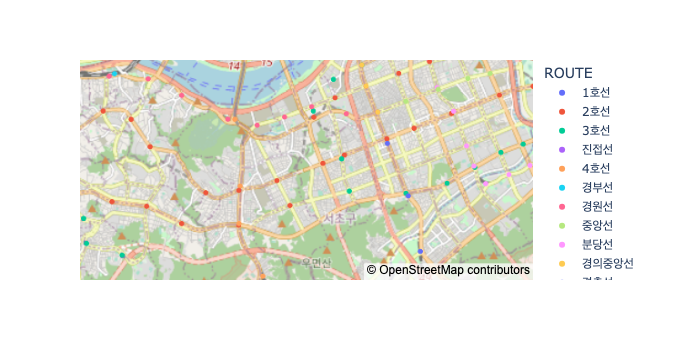

In [30]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter_mapbox(combined_df, lat="CRDNT_Y", lon="CRDNT_X", hover_name="STATN_NM",
                        color="ROUTE", size_max=10, zoom=12)
fig.update_layout(mapbox_style="open-street-map")
fig.show()